In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def load_json(path):
    with open(path, 'r') as file:
        data = json.load(file)
    return data

json_path = "/kaggle/input/company-revenue/parsed_all_V3.jsonl"
json_data = load_json(json_path)
labels = load_json("/kaggle/input/company-revenue/two_labels_clustering_result.json")
ids = [key for key in labels.keys()]
new_josn_data = []
for id in ids:
    for sample in json_data:
        if id == sample["soleadify_id"]:
            new_josn_data.append(sample)
            break
json_data = [sample for sample in json_data if sample["soleadify_id"] in ids]
labels = [labels[sample]["label"] for sample in labels.keys()]

In [ ]:
len(new_josn_data)

In [ ]:
def print_statistics(values, label):
    # Calculate statistics
    count = len(values)
    mean_value = np.mean(values)
    std_value = np.std(values)
    min_value = np.min(values)
    q25 = np.percentile(values, 25)
    median = np.median(values)
    q75 = np.percentile(values, 75)
    max_value = np.max(values)

    # Print statistics
    print(f"Statistics for Label {label}:")
    print(f"Count: {count}")
    print(f"Mean: {mean_value:.6f}")
    print(f"Standard Deviation: {std_value:.6f}")
    print(f"Minimum: {min_value:.6f}")
    print(f"25th Percentile: {q25:.6f}")
    print(f"Median: {median:.6f}")
    print(f"75th Percentile: {q75:.6f}")
    print(f"Maximum: {max_value:.6f}")
    print("\n")

def plot_histogram(data, labels, feature, start=0.0, stop=1.0, bins=100, n=5):
    unique_labels = list(set(labels))
    colors = ["red", "blue"]
    

    for i, label in enumerate(unique_labels):
        label_values = [item[feature] for k, item in enumerate(data) if labels[k] == label]
        plt.hist(label_values, bins=bins, range=(start, stop), color=colors[i], label=label, alpha=0.35)
        print_statistics(label_values, label)

    plt.xticks(np.linspace(start, stop, n).tolist())
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Estimated Revenue')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [87]:
import seaborn as sns

def plot_distribution(data, labels, feature):
    unique_labels = list(set(labels))
    colors = ["red", "blue"]

    for i, label in enumerate(unique_labels):
        label_values = [item[feature] for k, item in enumerate(data) if labels[k] == label]
        sns.kdeplot(label_values, fill=True, color=colors[i], label=label)
        print_statistics(label_values, label)

    plt.title(f'Distribution of {feature}')
    plt.xlabel('Estimated Revenue')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_map(data, labels):
    longitude_values = [item['main_latitude'] for item in data]
    latitude_values = [item['main_longitude'] for item in data]

    unique_labels = list(set(labels))
    colors = ["red", "blue"]

    for i, label in enumerate(unique_labels):
        label_longitude_values = [longitude_values[j] for j in range(len(longitude_values)) if labels[j] == label]
        label_latitude_values = [latitude_values[j] for j in range(len(latitude_values)) if labels[j] == label]
        plt.scatter(label_longitude_values, label_latitude_values, color=colors[i], marker='o', s=3, label=label, alpha=0.5)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Scatter Plot of Longitude and Latitude Values')
    plt.legend()
    plt.show()


Statistics for Label 1:
Count: 12554
Mean: 0.000045
Standard Deviation: 0.000017
Minimum: 0.000029
25th Percentile: 0.000034
Median: 0.000040
75th Percentile: 0.000050
Maximum: 0.000123


Statistics for Label 2:
Count: 30274
Mean: 0.000013
Standard Deviation: 0.000008
Minimum: 0.000000
25th Percentile: 0.000006
Median: 0.000013
75th Percentile: 0.000019
Maximum: 0.000029




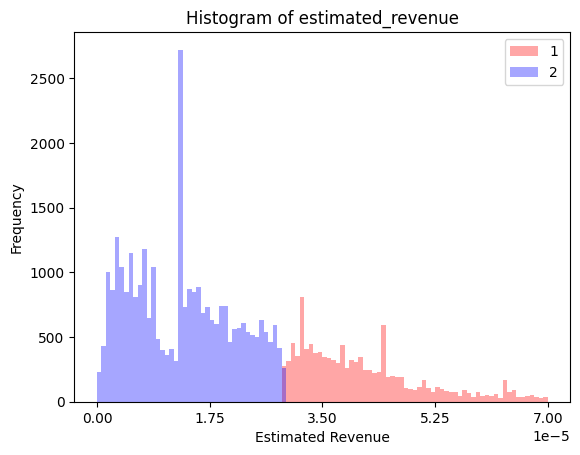

Statistics for Label 1:
Count: 12554
Mean: 0.000045
Standard Deviation: 0.000017
Minimum: 0.000029
25th Percentile: 0.000034
Median: 0.000040
75th Percentile: 0.000050
Maximum: 0.000123


Statistics for Label 2:
Count: 30274
Mean: 0.000013
Standard Deviation: 0.000008
Minimum: 0.000000
25th Percentile: 0.000006
Median: 0.000013
75th Percentile: 0.000019
Maximum: 0.000029




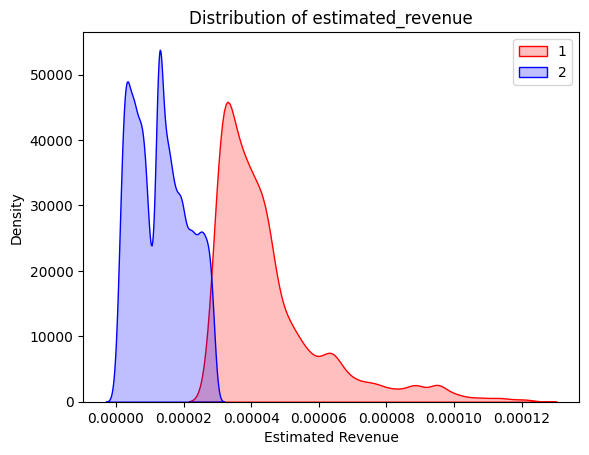

In [89]:
plot_histogram(new_josn_data, labels, 'estimated_revenue', 0.0, 0.00007)
plot_distribution(new_josn_data, labels, 'estimated_revenue')

Statistics for Label 1:
Count: 12554
Mean: 0.821585
Standard Deviation: 0.288103
Minimum: 0.000000
25th Percentile: 0.953271
Median: 0.953271
75th Percentile: 0.953271
Maximum: 0.990654


Statistics for Label 2:
Count: 30274
Mean: 0.824016
Standard Deviation: 0.286044
Minimum: 0.009346
25th Percentile: 0.953271
Median: 0.953271
75th Percentile: 0.953271
Maximum: 1.000000




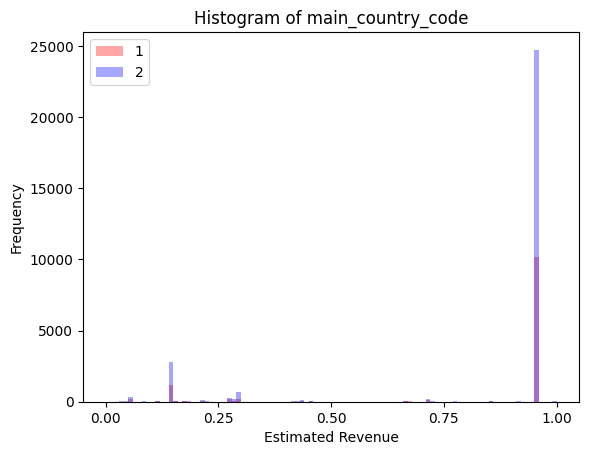

Statistics for Label 1:
Count: 12554
Mean: 0.821585
Standard Deviation: 0.288103
Minimum: 0.000000
25th Percentile: 0.953271
Median: 0.953271
75th Percentile: 0.953271
Maximum: 0.990654


Statistics for Label 2:
Count: 30274
Mean: 0.824016
Standard Deviation: 0.286044
Minimum: 0.009346
25th Percentile: 0.953271
Median: 0.953271
75th Percentile: 0.953271
Maximum: 1.000000




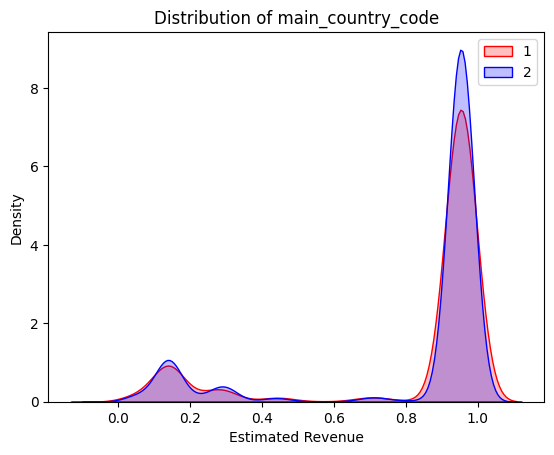

In [91]:
plot_histogram(new_josn_data, labels, 'main_country_code')
plot_distribution(new_josn_data, labels, 'main_country_code')

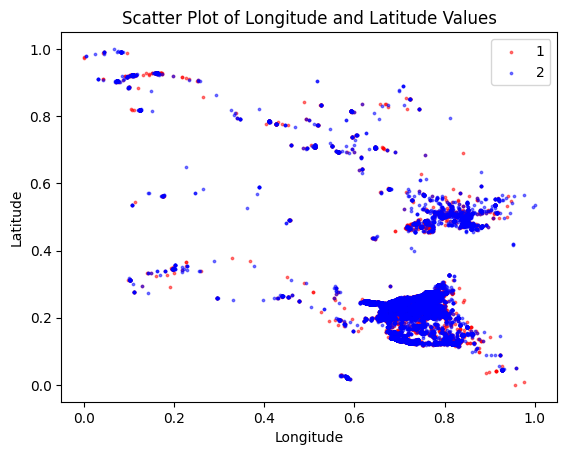

In [92]:
plot_map(new_josn_data, labels)

Statistics for Label 1:
Count: 12554
Mean: 0.000186
Standard Deviation: 0.002580
Minimum: 0.000000
25th Percentile: 0.000000
Median: 0.000046
75th Percentile: 0.000092
Maximum: 0.243909


Statistics for Label 2:
Count: 30274
Mean: 0.000128
Standard Deviation: 0.001169
Minimum: 0.000000
25th Percentile: 0.000000
Median: 0.000000
75th Percentile: 0.000046
Maximum: 0.114444




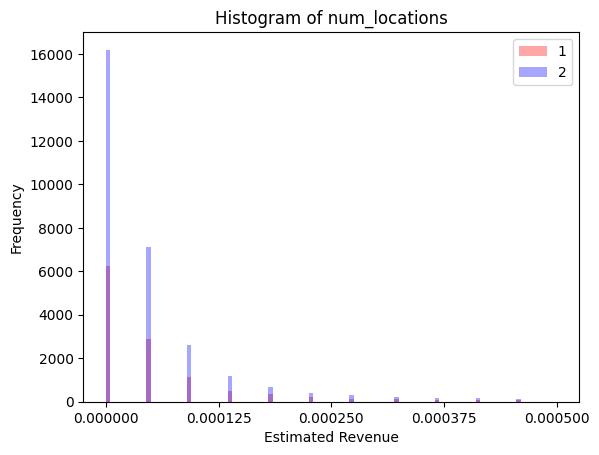

Statistics for Label 1:
Count: 12554
Mean: 0.000186
Standard Deviation: 0.002580
Minimum: 0.000000
25th Percentile: 0.000000
Median: 0.000046
75th Percentile: 0.000092
Maximum: 0.243909


Statistics for Label 2:
Count: 30274
Mean: 0.000128
Standard Deviation: 0.001169
Minimum: 0.000000
25th Percentile: 0.000000
Median: 0.000000
75th Percentile: 0.000046
Maximum: 0.114444




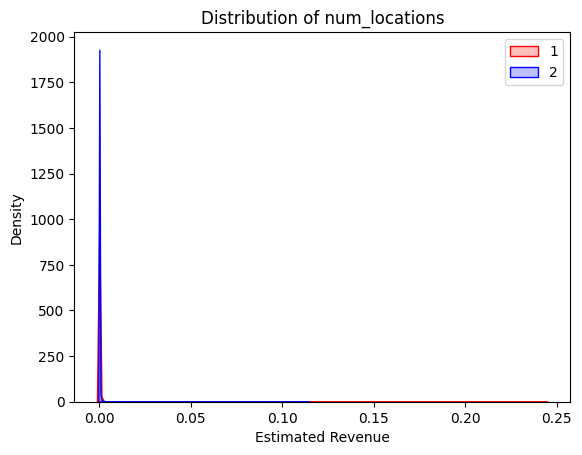

In [93]:
plot_histogram(new_josn_data, labels, 'num_locations', stop=0.0005)
plot_distribution(new_josn_data, labels, 'num_locations')

Statistics for Label 1:
Count: 12554
Mean: 0.007169
Standard Deviation: 0.084366
Minimum: 0.000000
25th Percentile: 0.000000
Median: 0.000000
75th Percentile: 0.000000
Maximum: 1.000000


Statistics for Label 2:
Count: 30274
Mean: 0.004360
Standard Deviation: 0.065888
Minimum: 0.000000
25th Percentile: 0.000000
Median: 0.000000
75th Percentile: 0.000000
Maximum: 1.000000




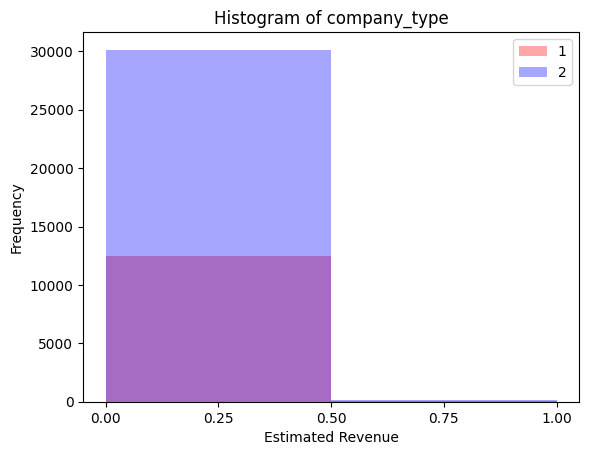

In [94]:
plot_histogram(new_josn_data, labels, 'company_type', bins=2)

Statistics for Label 1:
Count: 12554
Mean: 0.923484
Standard Deviation: 0.061889
Minimum: 0.351020
25th Percentile: 0.906122
Median: 0.938776
75th Percentile: 0.963265
Maximum: 1.000000


Statistics for Label 2:
Count: 30274
Mean: 0.934235
Standard Deviation: 0.060476
Minimum: 0.000000
25th Percentile: 0.920408
Median: 0.951020
75th Percentile: 0.971429
Maximum: 1.000000




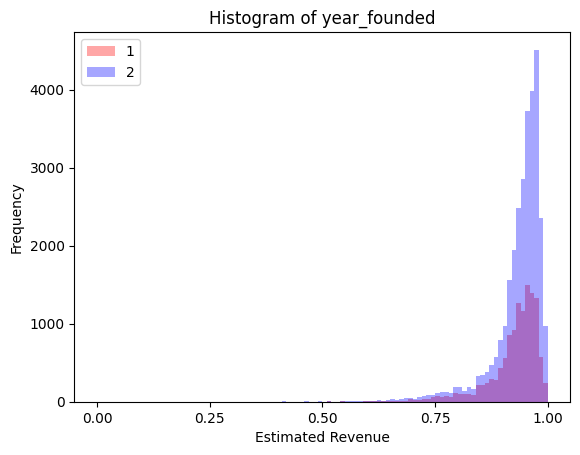

Statistics for Label 1:
Count: 12554
Mean: 0.923484
Standard Deviation: 0.061889
Minimum: 0.351020
25th Percentile: 0.906122
Median: 0.938776
75th Percentile: 0.963265
Maximum: 1.000000


Statistics for Label 2:
Count: 30274
Mean: 0.934235
Standard Deviation: 0.060476
Minimum: 0.000000
25th Percentile: 0.920408
Median: 0.951020
75th Percentile: 0.971429
Maximum: 1.000000




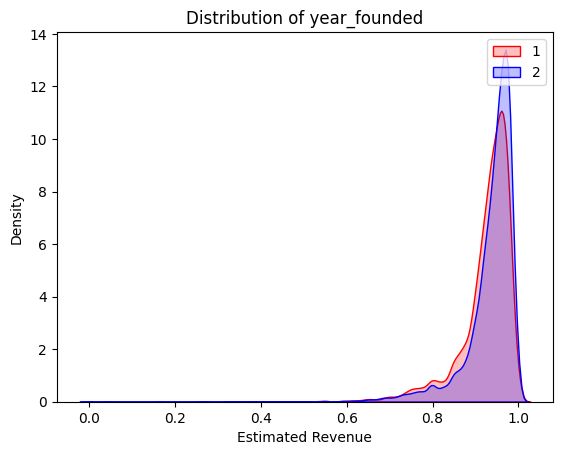

In [97]:
plot_histogram(new_josn_data, labels, 'year_founded')
plot_distribution(new_josn_data, labels, 'year_founded')

Statistics for Label 1:
Count: 12554
Mean: 0.000181
Standard Deviation: 0.004079
Minimum: 0.000000
25th Percentile: 0.000003
Median: 0.000010
75th Percentile: 0.000050
Maximum: 0.312499


Statistics for Label 2:
Count: 30274
Mean: 0.000118
Standard Deviation: 0.002009
Minimum: 0.000000
25th Percentile: 0.000003
Median: 0.000008
75th Percentile: 0.000034
Maximum: 0.178663




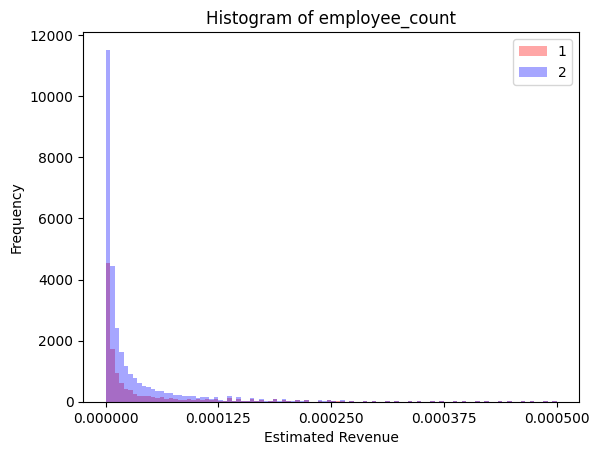

Statistics for Label 1:
Count: 12554
Mean: 0.000181
Standard Deviation: 0.004079
Minimum: 0.000000
25th Percentile: 0.000003
Median: 0.000010
75th Percentile: 0.000050
Maximum: 0.312499


Statistics for Label 2:
Count: 30274
Mean: 0.000118
Standard Deviation: 0.002009
Minimum: 0.000000
25th Percentile: 0.000003
Median: 0.000008
75th Percentile: 0.000034
Maximum: 0.178663




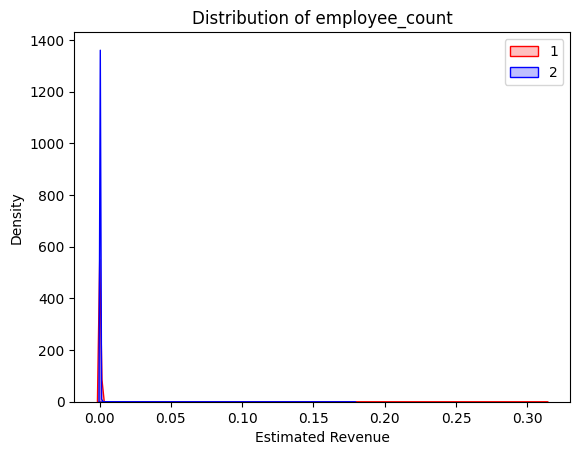

In [98]:
plot_histogram(new_josn_data, labels, 'employee_count', stop=0.0005)
plot_distribution(new_josn_data, labels, 'employee_count')

Statistics for Label 1:
Count: 12554
Mean: 0.454186
Standard Deviation: 0.193432
Minimum: 0.000000
25th Percentile: 0.273318
Median: 0.505141
75th Percentile: 0.529246
Maximum: 1.000000


Statistics for Label 2:
Count: 30274
Mean: 0.490893
Standard Deviation: 0.188991
Minimum: 0.000000
25th Percentile: 0.384130
Median: 0.516201
75th Percentile: 0.614236
Maximum: 1.000000




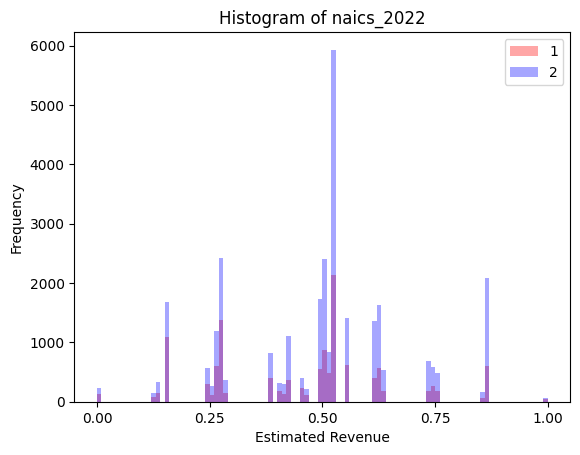

Statistics for Label 1:
Count: 12554
Mean: 0.454186
Standard Deviation: 0.193432
Minimum: 0.000000
25th Percentile: 0.273318
Median: 0.505141
75th Percentile: 0.529246
Maximum: 1.000000


Statistics for Label 2:
Count: 30274
Mean: 0.490893
Standard Deviation: 0.188991
Minimum: 0.000000
25th Percentile: 0.384130
Median: 0.516201
75th Percentile: 0.614236
Maximum: 1.000000




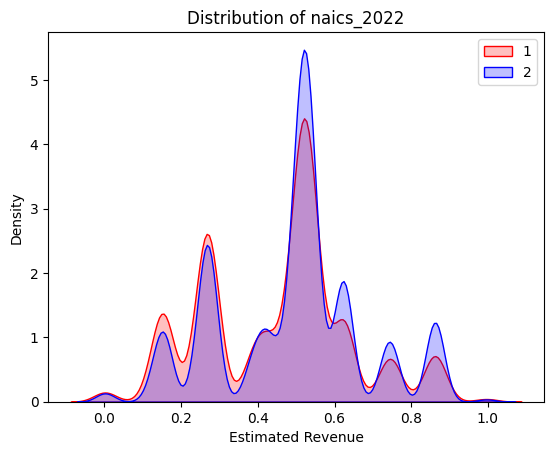

In [99]:
plot_histogram(new_josn_data, labels, 'naics_2022')
plot_distribution(new_josn_data, labels, 'naics_2022')

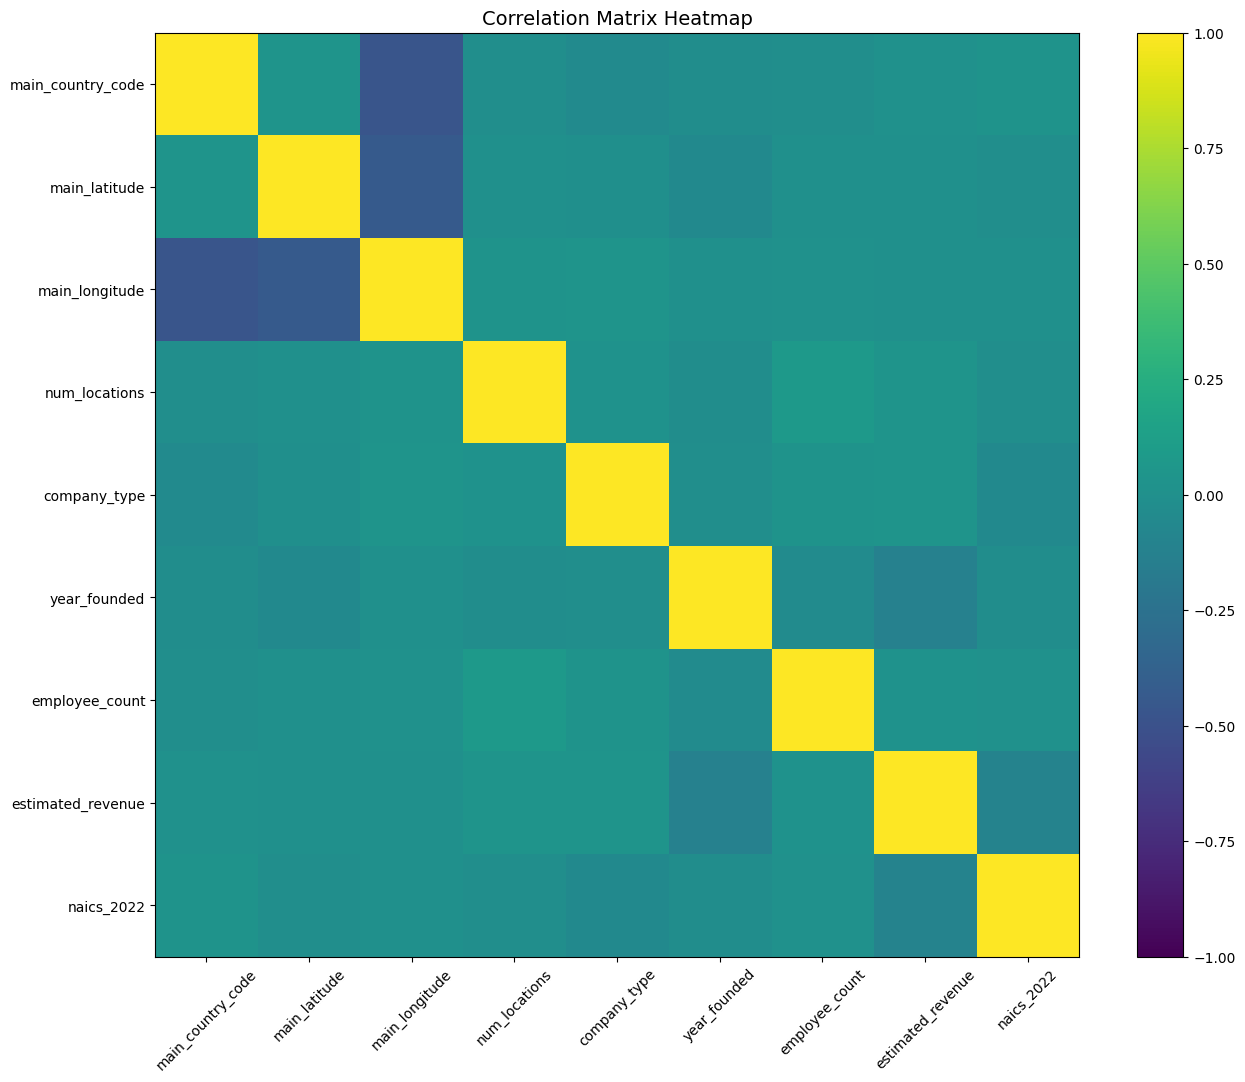

In [100]:
keys = json_data[0].keys()
keys = [key for key in keys if not isinstance(json_data[0][key], (dict, str, list))]

values_array = np.array([[sample[key] for key in keys] for sample in json_data])

correlation_matrix = np.corrcoef(values_array, rowvar=False)

# Plot the correlation matrix as a heatmap with larger size
plt.figure(figsize=(15, 12))
plt.imshow(correlation_matrix, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar()

# Add labels and title
plt.xticks(np.arange(len(keys)), keys, rotation=45, fontsize=10)
plt.yticks(np.arange(len(keys)), keys, fontsize=10)
plt.title('Correlation Matrix Heatmap', fontsize=14)

plt.show()

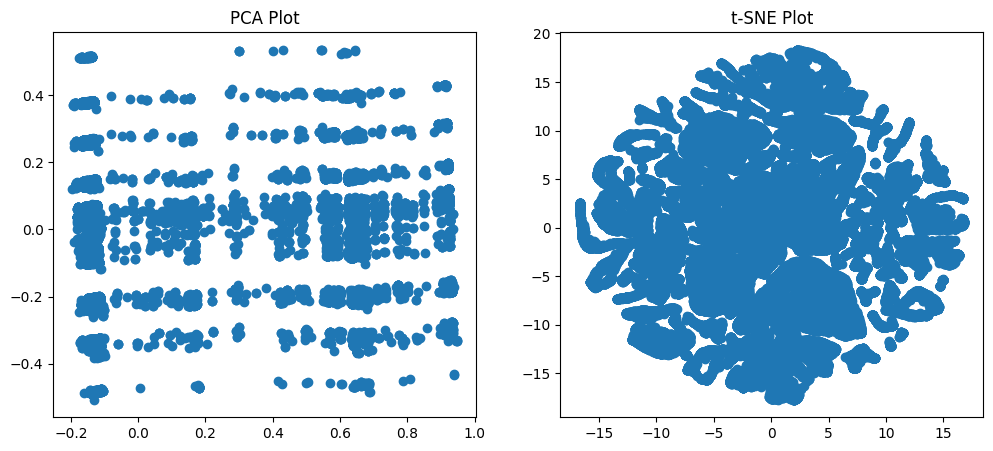

In [101]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
pca_result = pca.fit_transform(values_array)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(values_array)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Plot')

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE Plot')

plt.show()


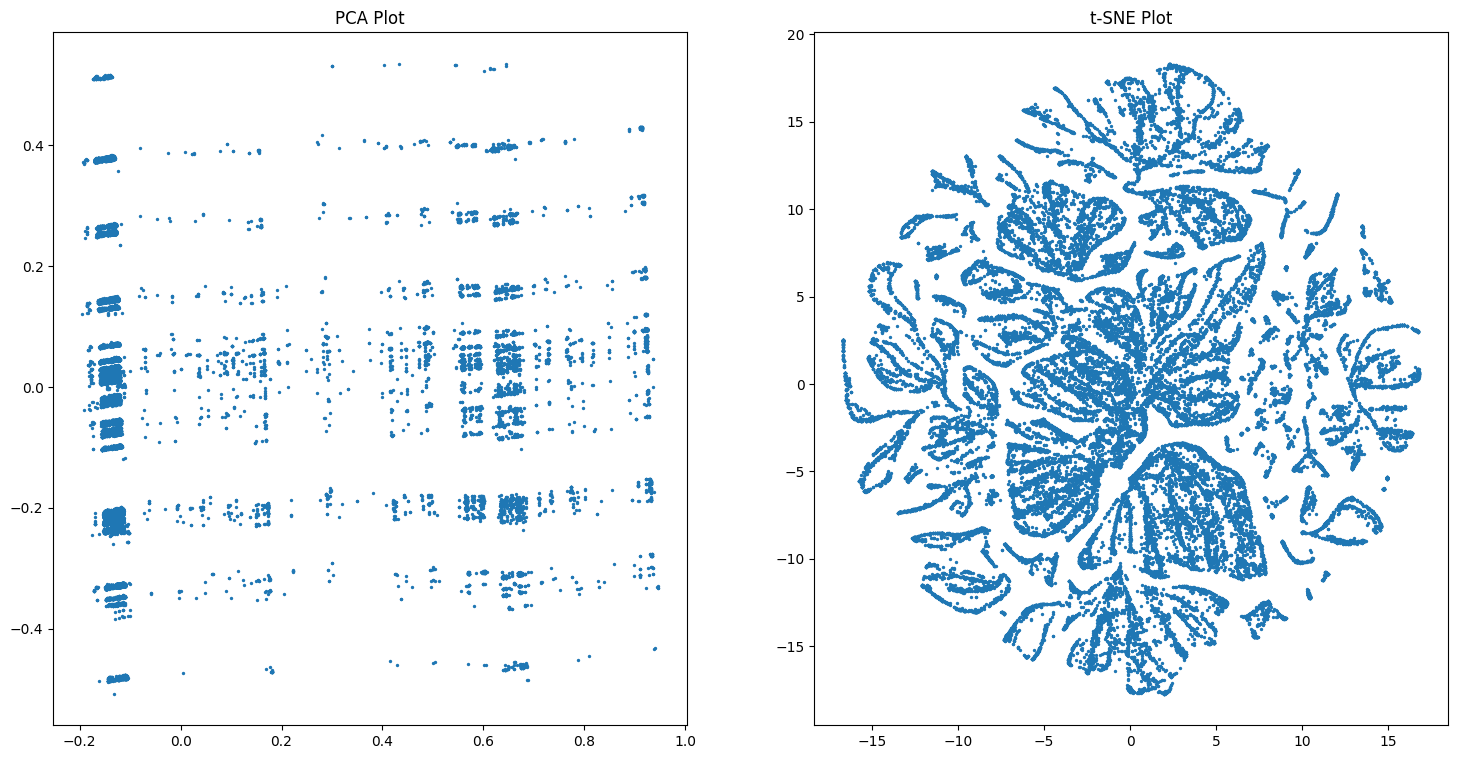

In [102]:
plt.figure(figsize=(18, 9))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=2)
plt.title('PCA Plot')

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=2)  
plt.title('t-SNE Plot')

plt.show()
